# 🩺 Diabetes Prediction Project

This diabetes prediction model is developed for educational and demonstration purposes.
It uses clinical parameters (like Glucose, Insulin, SkinThickness, etc.) that are typically obtained from medical checkups.
The model is intended for healthcare or research demonstration, not for direct public or self-diagnosis.

Dataset: Pima Indians Diabetes Dataset  
Author: Ravindi Gunasekara


In [1]:
#Import Required Libraries

#Data Handling
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

Load and Explore DataSet

In [2]:
#Load Dataset
df=pd.read_csv("diabetes.csv")

# Display first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Exploratory Analysis

In [3]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
#check for missing Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#checking duplicate values
duplicate_rows_df=df[df.duplicated()]
print(duplicate_rows_df.shape)

(0, 9)


In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
#check columns with invalid 0 values
cols_with_invalid_zeros=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
zero_counts=(df[cols_with_invalid_zeros]==0).sum()
print(zero_counts)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [11]:
#replace invalid zeros with median of the column
for col in cols_with_invalid_zeros:
    median_val=df.loc[df[col]!=0,col].median()
    df[col]=df[col].replace(0,median_val)

In [12]:
#count invalid zeros after replacing with median
zero_counts=(df[cols_with_invalid_zeros]==0).sum()
print(zero_counts)

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [13]:
print((df == 0).sum()) 

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [14]:
#checking class balance
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Visualization

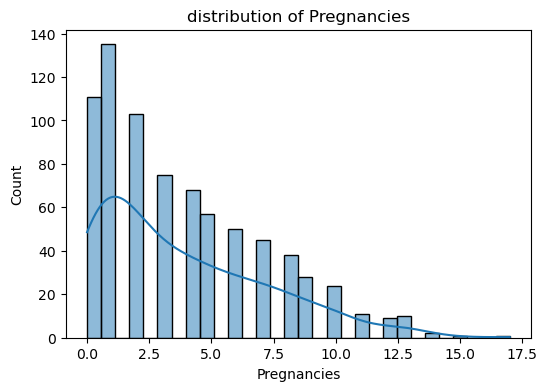

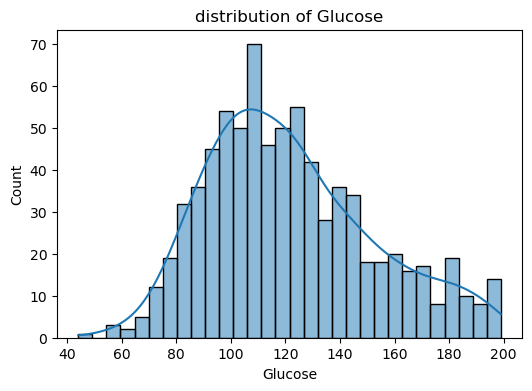

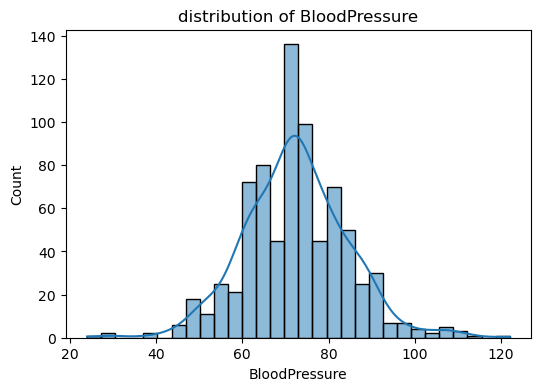

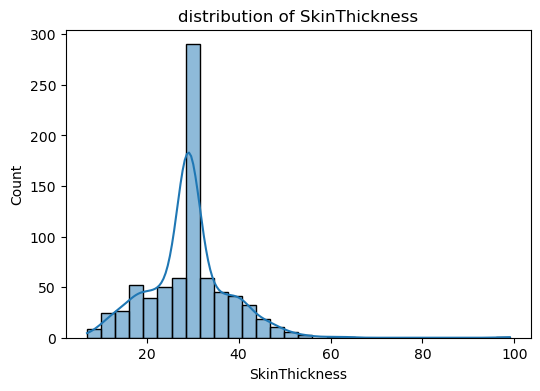

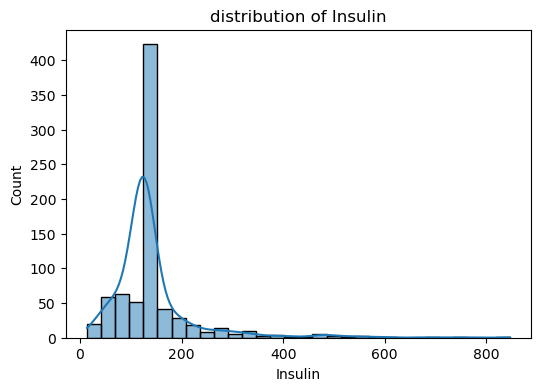

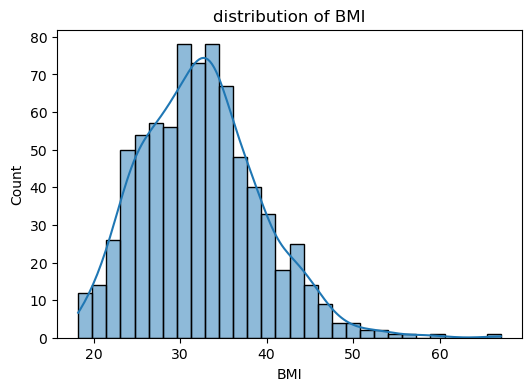

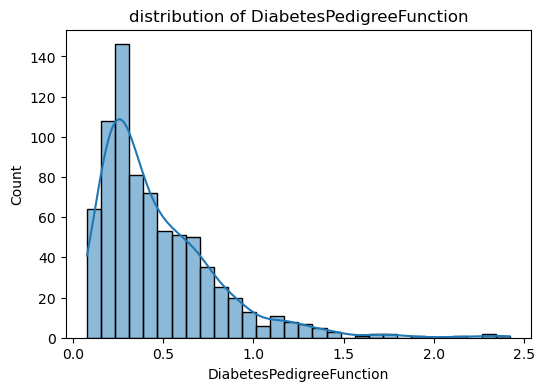

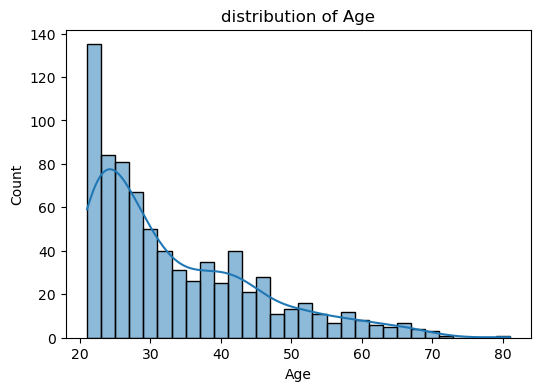

In [15]:

num_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(f'distribution of {col}')
    plt.show

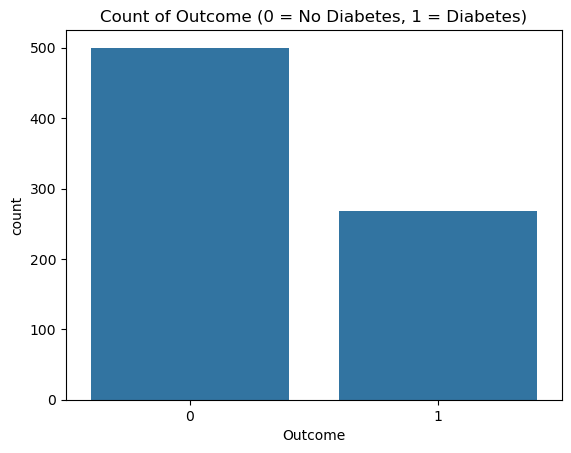

In [16]:
sns.countplot(x='Outcome', data=df)
plt.title("Count of Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.show()


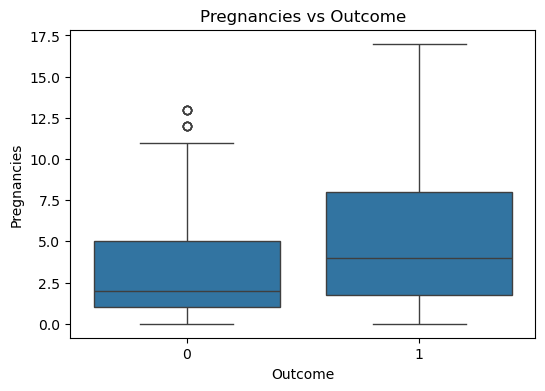

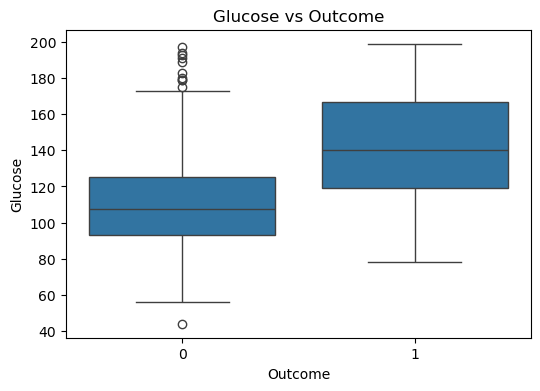

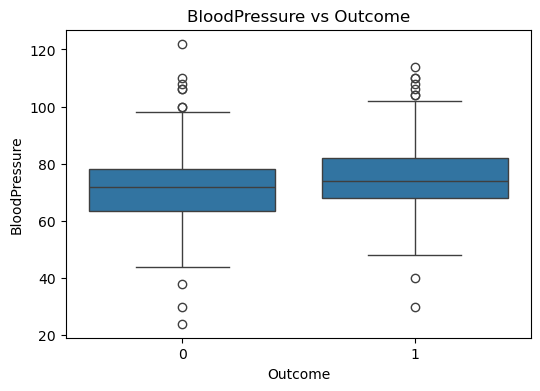

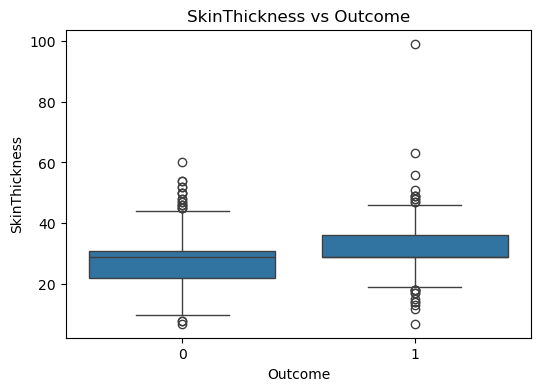

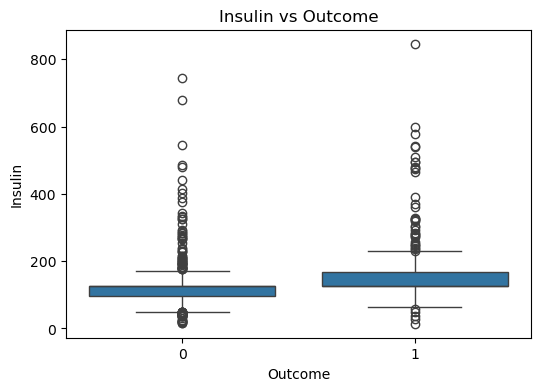

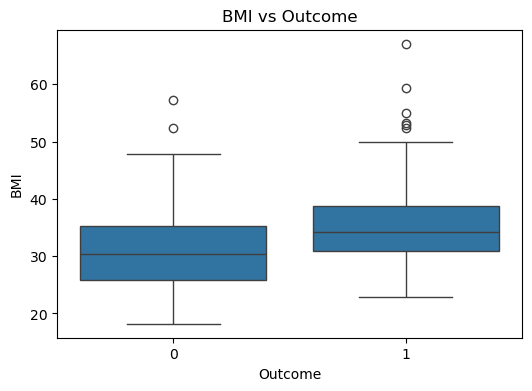

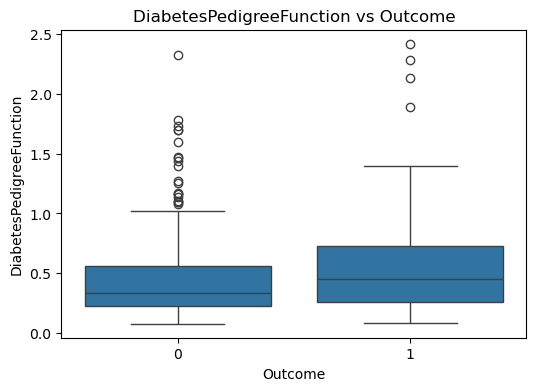

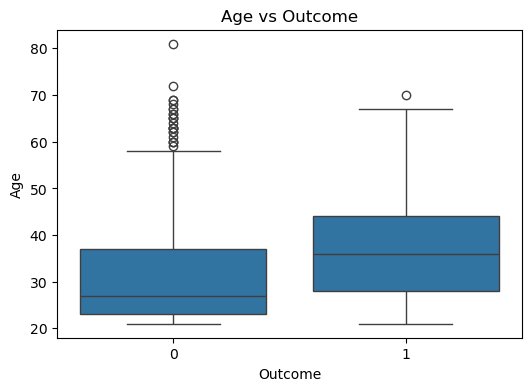

In [17]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f"{col} vs Outcome")
    plt.show()


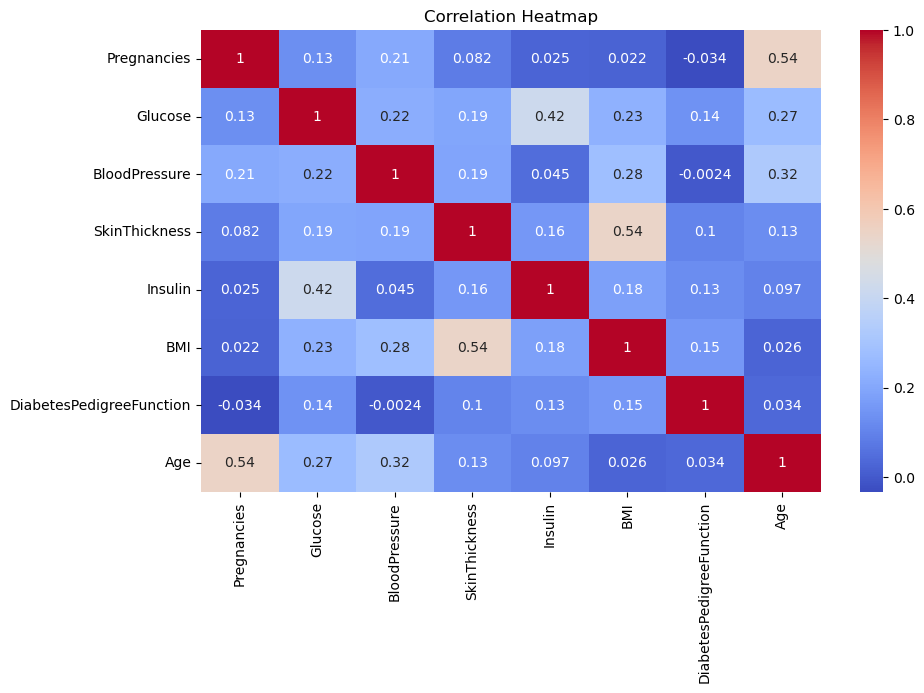

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Data Preprocessing

In [19]:
#divide target and features
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [20]:
#split dataset to train and set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
#scale dataset for more accuracy

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
print(y.value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


Model Training

KNN model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [24]:
#checking best parameters for knn model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': list(range(1, 21))}  
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)


best_k = grid.best_params_['n_neighbors']
print("Best k:", best_k)

Best k: 20


In [25]:
#knn model accuracy 
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

knn_best=KNeighborsClassifier(n_neighbors=best_k,metric='euclidean',weights='distance')

knn_best.fit(X_train_scaled,y_train)

y_pred=knn_best.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.7402597402597403
Confusion Matrix:
 [[82 17]
 [23 32]]


Logistic Regression

In [26]:
#check for best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled, y_train)

print("Best Params:", grid_lr.best_params_)
print("Best Accuracy:", grid_lr.best_score_)


Best Params: {'C': 1, 'solver': 'liblinear'}
Best Accuracy: 0.7687724910035986


In [27]:
#accuracy for logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression


log_reg=LogisticRegression(C=1,solver='liblinear',max_iter=500,random_state=42,class_weight='balanced')
log_reg.fit(X_train_scaled,y_train)
y_pred_lr=log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7012987012987013
[[69 30]
 [16 39]]


RandomForest

In [28]:
#check for best parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rand_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)
rand_rf.fit(X_train, y_train)

print("Best Params:", rand_rf.best_params_)
print("Best Accuracy:", rand_rf.best_score_)


Best Params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best Accuracy: 0.7753032120485139


In [29]:
#model tunning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


rf = RandomForestClassifier(n_estimators=200,min_samples_split=10,min_samples_leaf=1,max_depth=None,bootstrap=True,class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
report = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.7597402597402597
[[77 22]
 [15 40]]


XGBoost

In [30]:
#check for best parameters
import xgboost
from xgboost import XGBClassifier

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# ✅ Initialize the Model
xgb = XGBClassifier( eval_metric='logloss', random_state=42)

# ✅ Perform Randomized Search
rand_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=25,            # number of random combinations to try
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1             # use all CPU cores for speed
)

rand_xgb.fit(X_train, y_train)


print("\n✅ Best Parameters Found:")
print(rand_xgb.best_params_)
print("\nBest Cross-Validation Accuracy:", round(rand_xgb.best_score_, 4))



✅ Best Parameters Found:
{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}

Best Cross-Validation Accuracy: 0.7752


In [31]:

#model tunning
xgb = XGBClassifier(max_depth=4,n_estimators=200,learning_rate=0.01,gamma=0.1,subsample=0.6,colsample_bytree=0.8, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7402597402597403
[[80 19]
 [21 34]]


Model Accuracy Comparison

In [ ]:
models = {
    "KNN":accuracy_score(y_test, y_pred),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

for name, acc in models.items():
    print(f"{name}: {acc:.4f}")


KNN: 0.7403
Logistic Regression: 0.7013
Random Forest: 0.7597
XGBoost: 0.7403


Model Evaluation


XGBoost Results:
Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154


KNN Results:
Accuracy: 0.35714285714285715
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.36      1.00      0.53        55

    accuracy                           0.36       154
   macro avg       0.18      0.50      0.26       154
weighted avg       0.13      0.36      0.19       154


Random Forest Results:
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        99
           1       0.65      0.73      0.68        55

    accuracy                          

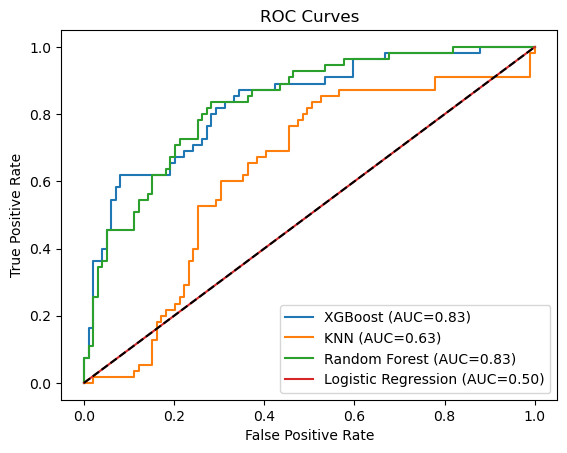

In [44]:

models = [xgb, knn_best, rf, log_reg]
model_names = ["XGBoost", "KNN", "Random Forest", "Logistic Regression"]

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:,1]  
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_probs):.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


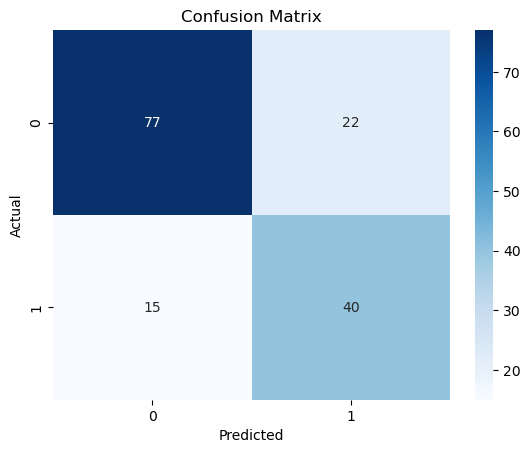

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Save Models

In [41]:
import joblib

#save models

joblib.dump(rf,"rf_model.pkl")


['rf_model.pkl']

Prediction 

In [ ]:
import joblib
import numpy as np

model = joblib.load("rf_model.pkl")

feature_order = [
    'Pregnancies', 
    'Glucose', 
    'BloodPressure', 
    'SkinThickness', 
    'Insulin', 
    'BMI', 
    'DiabetesPedigreeFunction', 
    'Age'
]

data = np.array([[2, 85, 66, 29, 0,  26.6,0.351, 31]])

prediction = model.predict(data)
prob = model.predict_proba(data)[0][1]

threshold = 0.5  
prediction = 1 if prob >= threshold else 0

# Output results
if prediction == 1:
    print("Prediction: Diabetic")
else:
    print("Prediction: Non-diabetic")

print(f"Diabetic probability: {prob*100:.0f}%")



Prediction: Non-diabetic
Diabetic probability: 8%


In [43]:


importances = pd.Series(model.feature_importances_, 
                        index=['Pregnancies','Glucose','BloodPressure','SkinThickness',
                               'Insulin','BMI','DPF','Age'])
print(importances.sort_values(ascending=False))


Glucose          0.279599
BMI              0.178216
Age              0.150452
Insulin          0.102575
DPF              0.099424
SkinThickness    0.068891
Pregnancies      0.060428
BloodPressure    0.060414
dtype: float64
